<a href="https://colab.research.google.com/github/KharchenkoAnastasia/credit-default-risk-analysis/blob/main/Home_Credit_Default_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) of Home Credit Default Risk**

This analysis focuses on the Home Credit Default Risk dataset, provided as part of a Kaggle competition. The primary goal of this dataset is to predict the likelihood of a client defaulting on a loan. By analyzing the available data, we aim to uncover patterns, identify key features, and gain insights into the factors contributing to loan default.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
# Extract the training dataset
with zipfile.ZipFile('/content/application_train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [3]:
df = pd.read_csv("/content/application_train.csv")

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### **Data structure check**

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
df.shape

(307511, 122)

### **Statistical report for numeric variables**

In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### **Analysis of categorical variables**

In [8]:
df.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [9]:
df.select_dtypes(include='object').columns.size

16

### **Analysis of numerical variables**

In [10]:
number_df=df.select_dtypes(include='number')
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [11]:
number_df.columns.size

106

In [12]:
number_df.head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,-3130,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,-449,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,-20099,365243,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,0,135000.0,405000.0,20250.0,405000.0,0.019689,-14469,-2019,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### **Working with Incorrect Data Types**

Checking if we have a column with the wrong data type.

In [13]:
pd.set_option('display.max.rows',130)
df.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64


By looking at the data and its corresponding data types, you can change the type of the SKU column.

In [14]:
df['SK_ID_CURR']=df['SK_ID_CURR'].astype('str')

Look at what data is contained in the columns that have the "Flag" at the beginning

In [15]:
flag_cols = ['FLAG' in col for col in df.columns]

In [16]:
df[df.columns[flag_cols]]

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,N,N,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,N,Y,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307508,N,Y,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307509,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df[df.columns[flag_cols]].nunique()

,0
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
FLAG_MOBIL,2
FLAG_EMP_PHONE,2
FLAG_WORK_PHONE,2
FLAG_CONT_MOBILE,2
FLAG_PHONE,2
FLAG_EMAIL,2
FLAG_DOCUMENT_2,2
FLAG_DOCUMENT_3,2


Нou can see that each column can only contain one of two values ​​and has type int. So you can change the int type to a boolean type to save memory.

In [18]:
str_flag_cols = ['FLAG_OWN_REALTY', 'FLAG_OWN_CAR']
df[str_flag_cols].head()

,FLAG_OWN_REALTY,FLAG_OWN_CAR
0,Y,N
1,N,N
2,Y,Y
3,Y,N
4,Y,N


In [19]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)
df[str_flag_cols].head()

,FLAG_OWN_REALTY,FLAG_OWN_CAR
0,1,0
1,0,0
2,1,1
3,1,0
4,1,0


### **Handle Missing Values**

In [20]:
df.isnull().values.any()

np.True_

In [21]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


In [22]:
df.isnull().values.sum()

np.int64(9152465)

In [23]:
df.columns[df.isnull().any()].size

67

In [24]:
null_columns=df.columns[df.isnull().any()]
null_columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

We have 9152465 NULL values ​​in 67 columns.

**Check the number and percentage of Null values ​​in columns**

In [25]:
null_df = df[null_columns].isnull().sum().reset_index()
null_df.columns = ["name_column","count_null"]
null_df['null_percentage']=round((null_df['count_null']/df.shape[0])*100,2)
null_df=null_df.sort_values(by = "null_percentage", ascending = False)
null_df

,name_column,count_null,null_percentage
41,COMMONAREA_MEDI,214865,69.87
27,COMMONAREA_MODE,214865,69.87
13,COMMONAREA_AVG,214865,69.87
35,NONLIVINGAPARTMENTS_MODE,213514,69.43
49,NONLIVINGAPARTMENTS_MEDI,213514,69.43
21,NONLIVINGAPARTMENTS_AVG,213514,69.43
51,FONDKAPREMONT_MODE,210295,68.39
19,LIVINGAPARTMENTS_AVG,210199,68.35
47,LIVINGAPARTMENTS_MEDI,210199,68.35
33,LIVINGAPARTMENTS_MODE,210199,68.35


**Remove columns with NULL values ​​> 40%**

In [26]:
cols_to_delete = null_df[null_df["null_percentage"]>40]["name_column"].to_list()
cols_to_delete

['COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [27]:
len(cols_to_delete)

49

In [28]:
df.drop(cols_to_delete, axis = 1,inplace = True)

In [29]:
df.shape

(307511, 73)

The dataframe has 73 columns after remove.

### **Check columns with NULL values ​​< 40%**

In [30]:
null_df_under40 = null_df[null_df["null_percentage"]<40].reset_index(drop=True)
null_df_under40

,name_column,count_null,null_percentage
0,OCCUPATION_TYPE,96391,31.35
1,EXT_SOURCE_3,60965,19.83
2,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
3,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
4,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50
5,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
6,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
7,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
8,NAME_TYPE_SUITE,1292,0.42
9,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33


**Let's work through each of the columns.**

**Analyze the OCCUPATION TYPE column**

In [31]:
null_df_under40.loc[null_df_under40["name_column"]=='OCCUPATION_TYPE']

,name_column,count_null,null_percentage
0,OCCUPATION_TYPE,96391,31.35


In [32]:
df['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
Laborers,55186
Sales staff,32102
Core staff,27570
Managers,21371
Drivers,18603
High skill tech staff,11380
Accountants,9813
Medicine staff,8537
Security staff,6721


Replace NULL values ​​in the "Unknown" column with Unknown

In [33]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(value="Unknown")

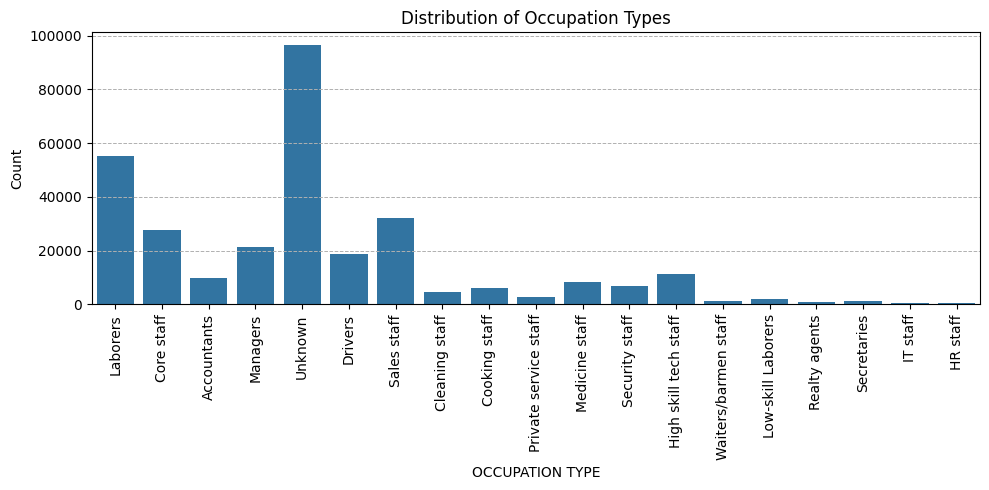

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x = 'OCCUPATION_TYPE')
plt.title('Distribution of Occupation Types')
plt.xlabel('OCCUPATION TYPE')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()



> From the "Distribution of Occupation Types" graph, it is evident that Laborers form the largest group of loan applicants. Missing values make up 31.35% of the data. Given the categorical nature of the "OCCUPATION_TYPE" column, imputing these missing values using a constant such as the mode could distort the analysis and subsequent calculations. Therefore, it is advisable to leave the missing values as they are, ensuring the integrity of the dataset for further exploration and modeling.



**Analyze the EXT_SOURCE_3**

In [35]:
df['EXT_SOURCE_3'].dtype

dtype('float64')

In [36]:
null_df_under40.loc[null_df_under40["name_column"]=='EXT_SOURCE_3']

,name_column,count_null,null_percentage
1,EXT_SOURCE_3,60965,19.83


In [37]:
df['EXT_SOURCE_3'].value_counts()

,count
EXT_SOURCE_3,
0.746300,1460
0.713631,1315
0.694093,1276
0.670652,1191
0.652897,1154
...,...
0.028275,1
0.858178,1
0.849170,1


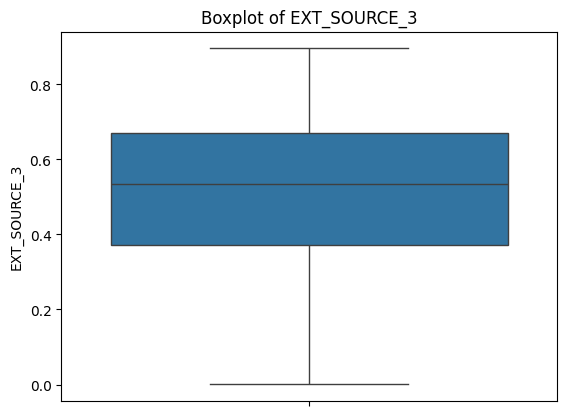

In [38]:
sns.boxplot(data=df, y='EXT_SOURCE_3')
plt.title('Boxplot of EXT_SOURCE_3')
plt.ylabel('EXT_SOURCE_3')
plt.show()

Get percentile values ​​for EXT_SOURCE_3.

In [39]:
df.EXT_SOURCE_3.quantile([.01,.25,.50,.75,1])

,EXT_SOURCE_3
0.01,0.064672
0.25,0.370650
0.50,0.535276
0.75,0.669057
1.00,0.896010


In [40]:
pd.set_option('float_format','{:.2f}'.format )
df.EXT_SOURCE_3.describe()

,EXT_SOURCE_3
count,246546.00
mean,0.51
std,0.19
min,0.00
25%,0.37
50%,0.54
75%,0.67
max,0.90


Most repeated value in `EXT_SOURCE_3

In [41]:
df["EXT_SOURCE_3"].mode()[0]

np.float64(0.746300213050371)

Check the average value of EXT_SOURCE_3

In [42]:
df.EXT_SOURCE_3.mean()

np.float64(0.5108529061799658)

**Observation**

The distribution analysis reveals the following:


*   The median value is 0.5353.
*   The most frequent value (mode) is 0.7463.
*   The mean value is 0.5109.


The mean and median are close, suggesting a relatively symmetrical distribution. However, the percentage of missing values is 19.83%, which is significant. Imputing these missing values based on any single measure of central tendency (mean, median, or mode) could introduce bias or distort the data distribution.

Thus, it is recommended to retain the data as is without imputation. If the analysis or model requires imputing missing values, one approach could be to impute the data using the median (as it is less sensitive to outliers) and create an additional column to indicate which values were imputed.





**Analyze of AMT_REQ_CREDIT_BUREAU columns**

In [45]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].dtype

dtype('float64')

In [46]:
null_df_under40.loc[null_df_under40["name_column"]=='AMT_REQ_CREDIT_BUREAU_YEAR']

,name_column,count_null,null_percentage
5,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50


In [47]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

,count
AMT_REQ_CREDIT_BUREAU_YEAR,
0.00,71801
1.00,63405
2.00,50192
3.00,33628
4.00,20714
5.00,12052
6.00,6967
7.00,3869
8.00,2127


In [44]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.quantile([.01,.25,.50,.75,1])

,AMT_REQ_CREDIT_BUREAU_YEAR
0.01,0.00
0.25,0.00
0.50,1.00
0.75,3.00
1.00,25.00


In [48]:
df["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0]

np.float64(0.0)

In [49]:
df["AMT_REQ_CREDIT_BUREAU_YEAR"].mean()

np.float64(1.899974435321363)

In [50]:
df["AMT_REQ_CREDIT_BUREAU_YEAR"].median()

1.0